In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Data
file_path = "../data_pipeline/data/stack-overflow-developer-survey-2018/survey_results_public.csv"
df = pd.read_csv(file_path)

/var/folders/9d/cp5xkdrd7vl8h9w3xj_jk7hw0000gn/T/ipykernel_65065/3380872536.py:3: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
# Display First Few Rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4           7   Yes         No    South Africa  Yes, part-time   

           Employment                                    FormalEducation  \
0  Employed part-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
2  Employed full-time                                   Associate degree   
3  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Employed full-time  Some college/university study without earning ...   

                                      UndergradMajor  \
0                          Mathematics or statistics   
1  

In [5]:
# Basic Stats
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
          Respondent    AssessJob1    AssessJob2    AssessJob3    AssessJob4  \
count   98855.000000  66985.000000  66985.000000  66985.000000  66985.000000   
mean    50822.971635      6.397089      6.673524      5.906875      4.065791   
std     29321.650410      2.788428      2.531202      2.642734      2.541196   
min         1.000000      1.000000      1.000000      1.000000      1.000000   
25%     25443.500000      4.000000      5.000000      4.000000      2.000000   
50%     50823.000000      7.000000      7.000000      6.000000      4.000000   
75%     76219.500000      9.000000      9.000000      8.000000      6.000000   
max    101592.000000     10.000000     10.000000     10.000000     10.000000   

         AssessJob5    AssessJob6    AssessJob7    AssessJob8    AssessJob9  \
count  66985.000000  66985.000000  66985.000000  66985.000000  66985.000000   
mean       3.953243      4.407196      5.673181      4.225200      7.640009   
std        2.520499    

In [6]:
# Data Types and Missing Values
print("\nData Types and Missing Values:")
print(df.info())


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB
None


In [7]:
# Handling Missing Values (Exploration)
missing_percentage = df.isnull().sum() * 100 / len(df)
print("\nMissing Values Percentage:")
print(missing_percentage)


Missing Values Percentage:
Respondent        0.000000
Hobby             0.000000
OpenSource        0.000000
Country           0.416772
Student           3.999798
                   ...    
Age              34.678064
Dependents       36.678974
MilitaryUS       84.036215
SurveyTooLong    33.295230
SurveyEasy       33.357949
Length: 129, dtype: float64



Univariate Analysis: Numerical Columns


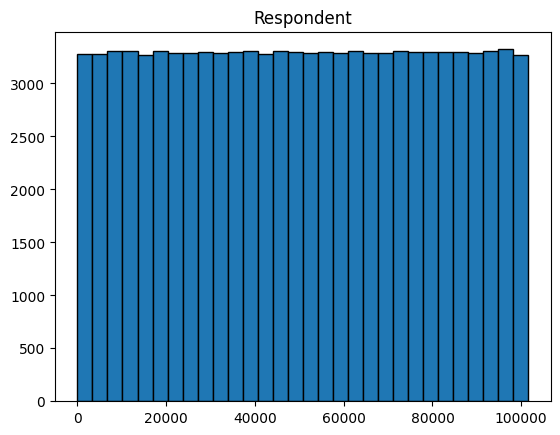

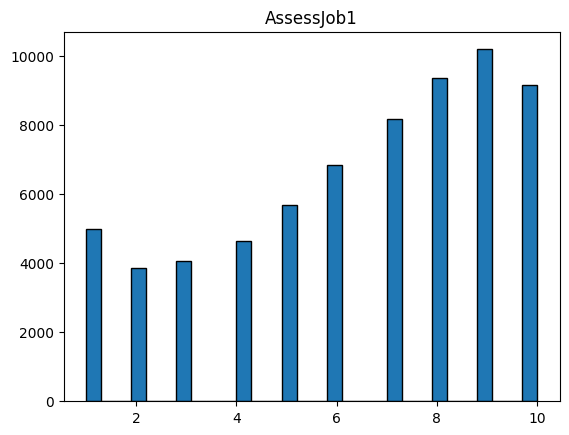

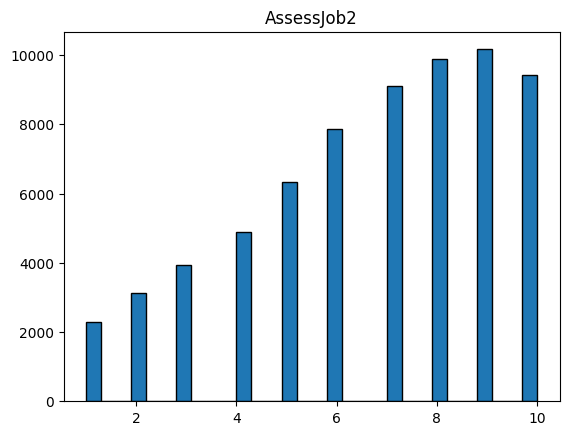

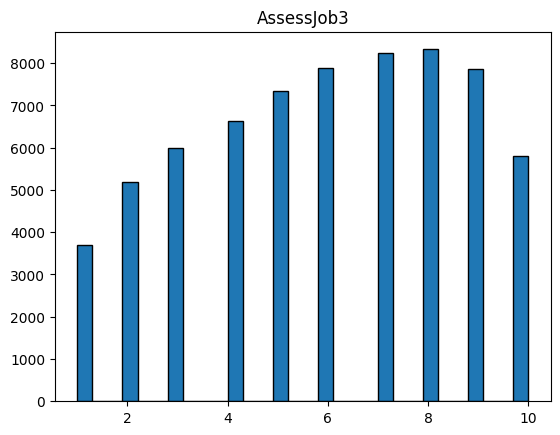

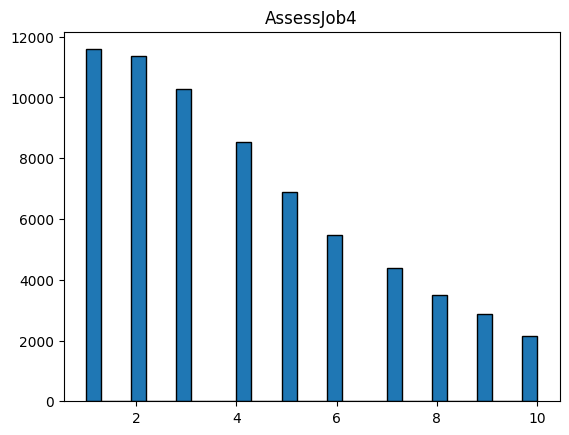

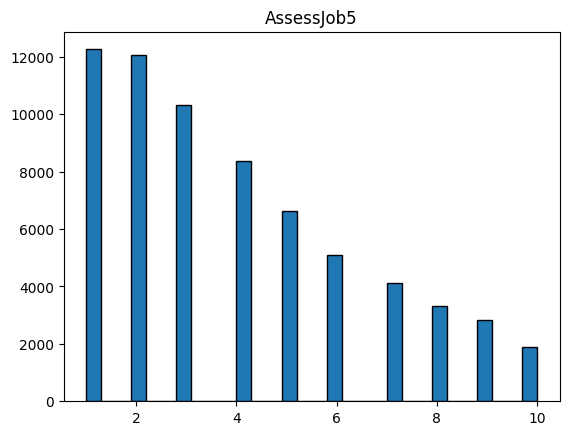

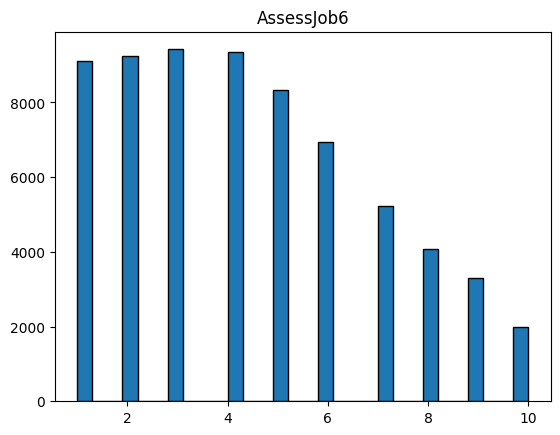

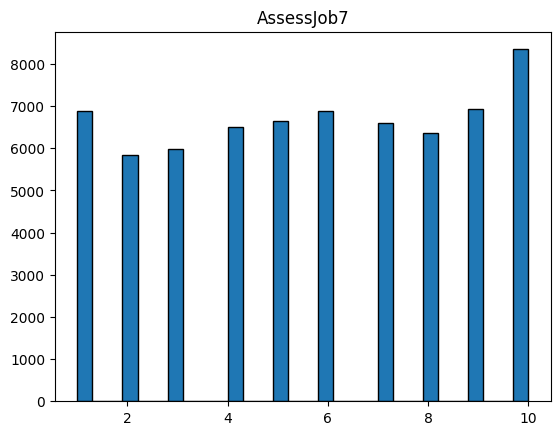

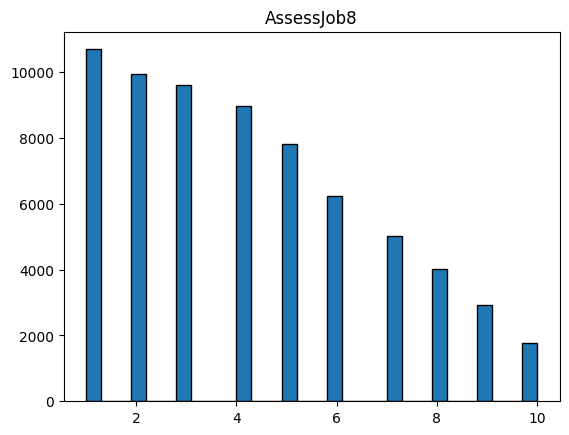

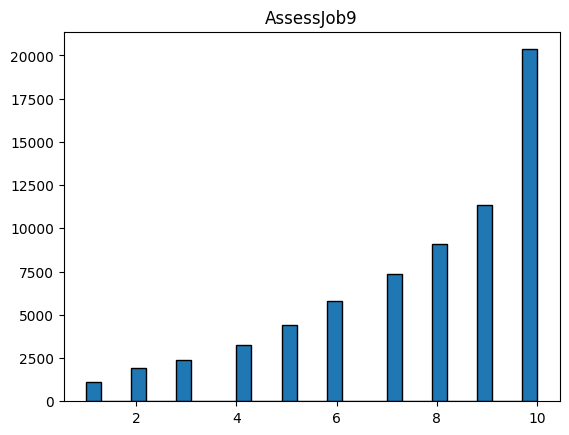

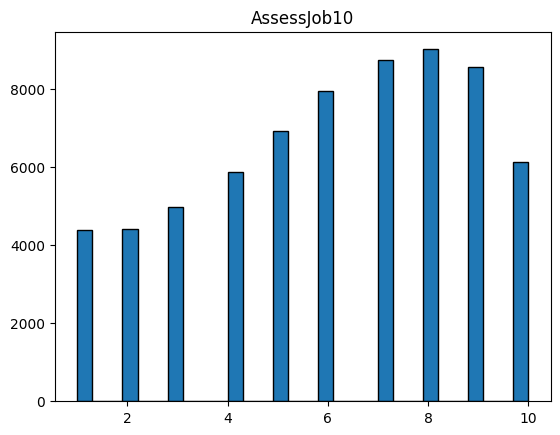

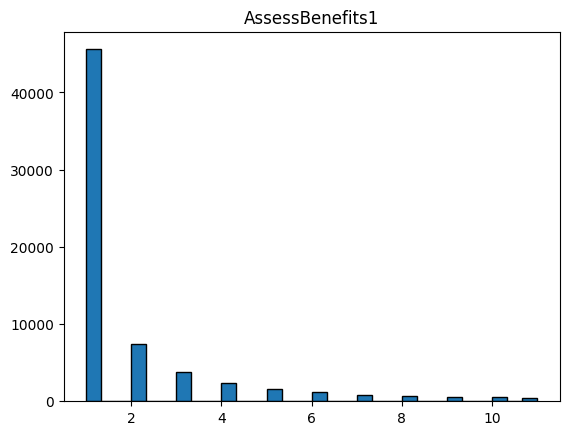

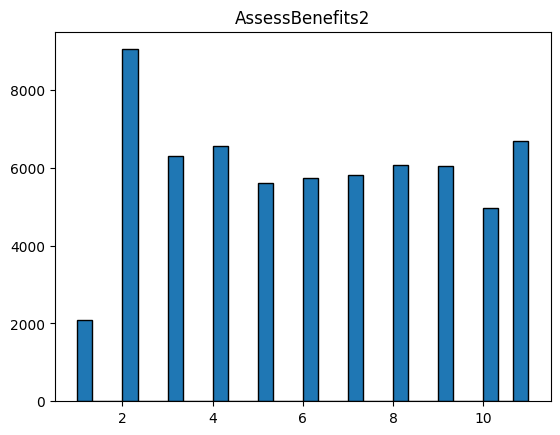

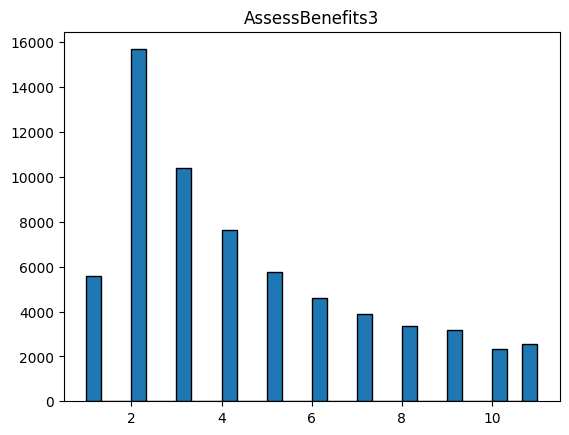

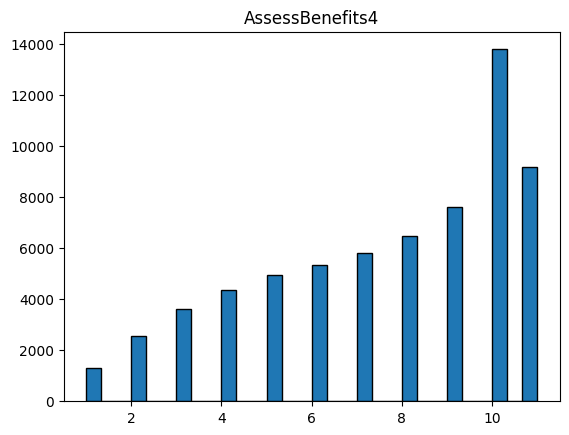

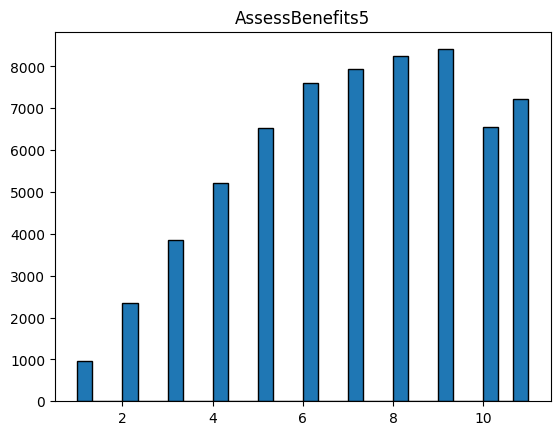

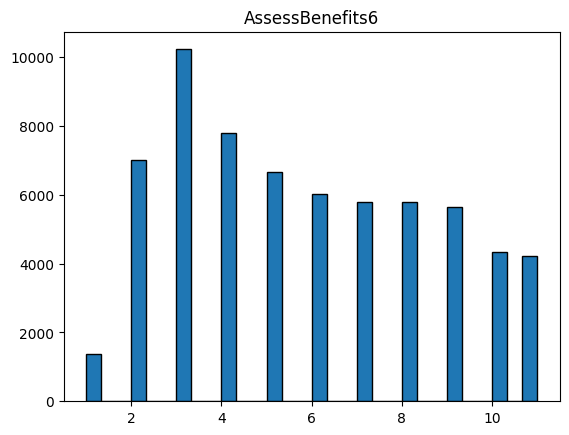

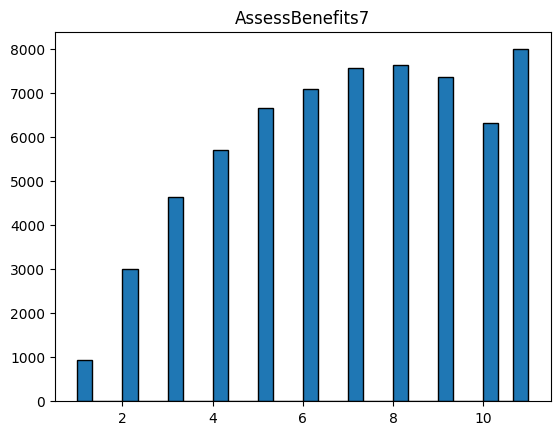

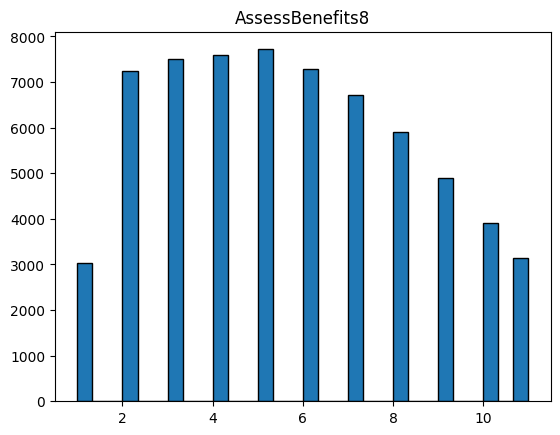

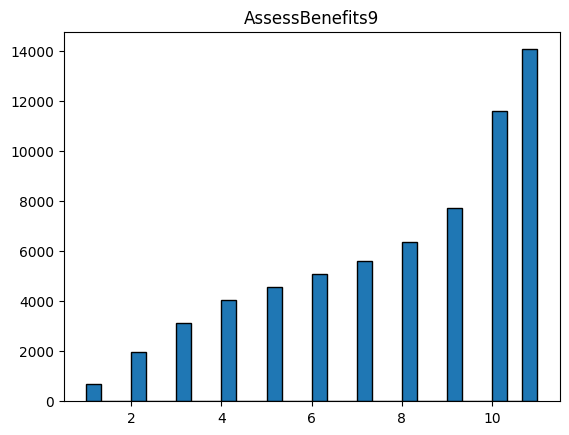

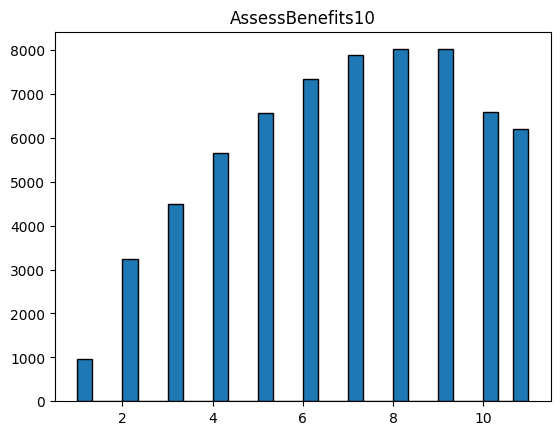

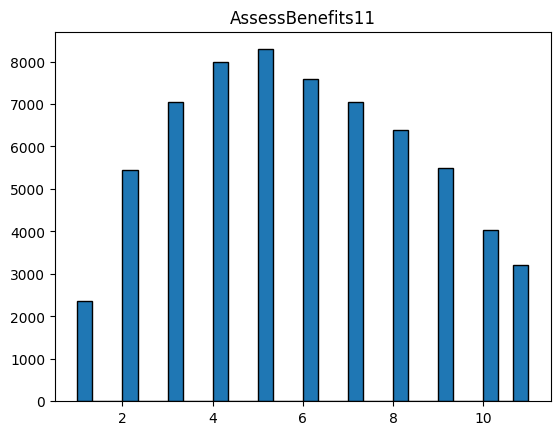

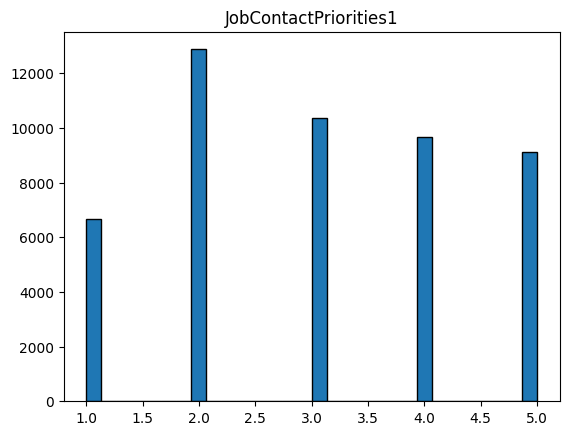

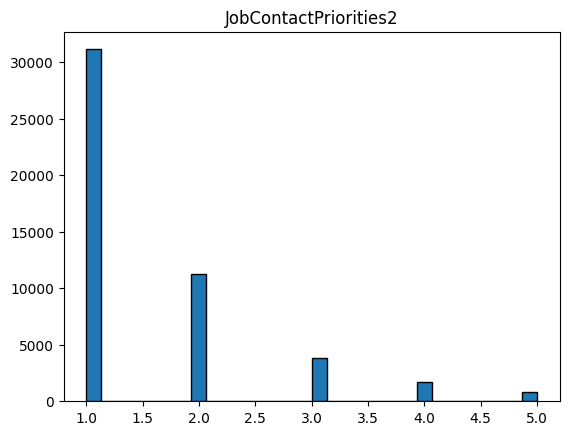

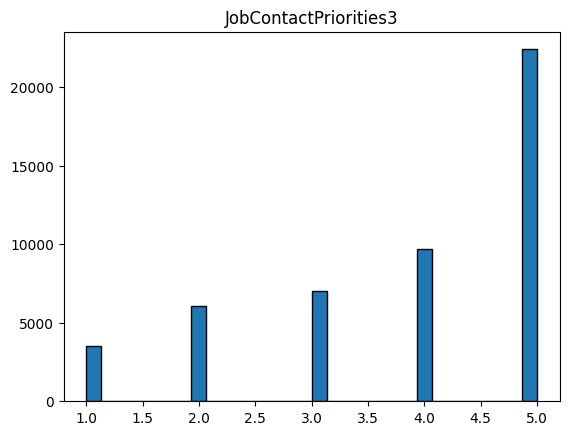

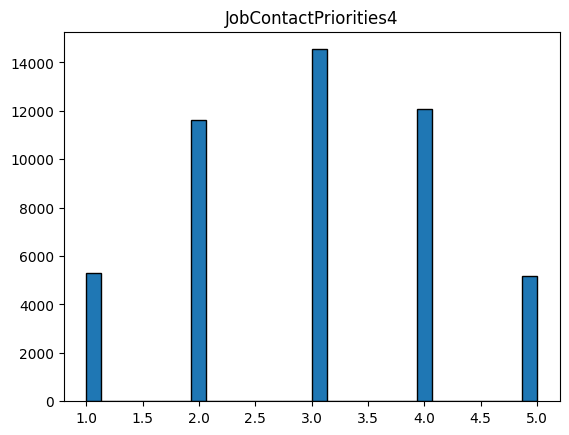

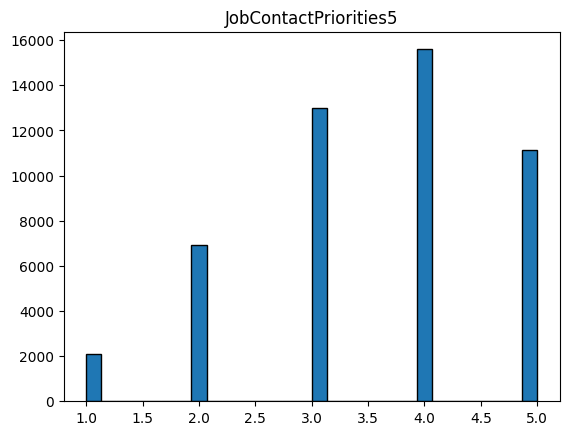

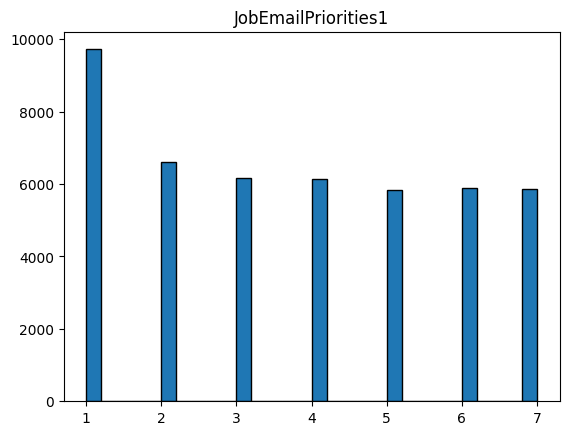

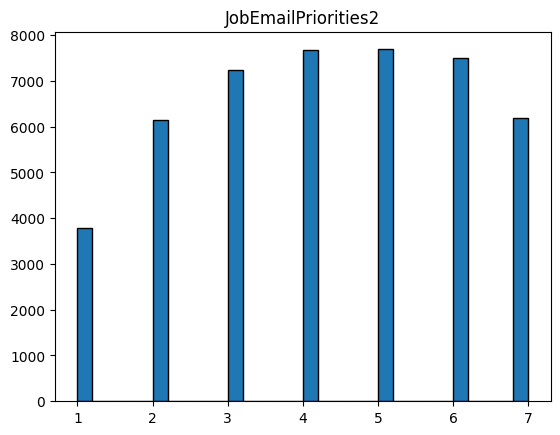

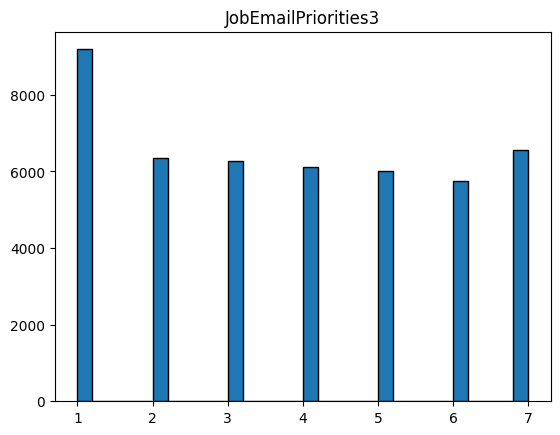

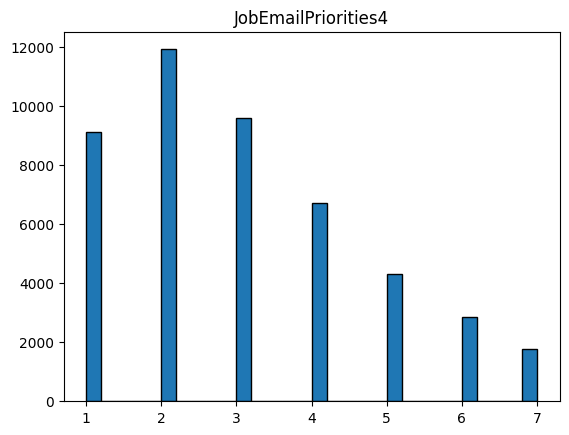

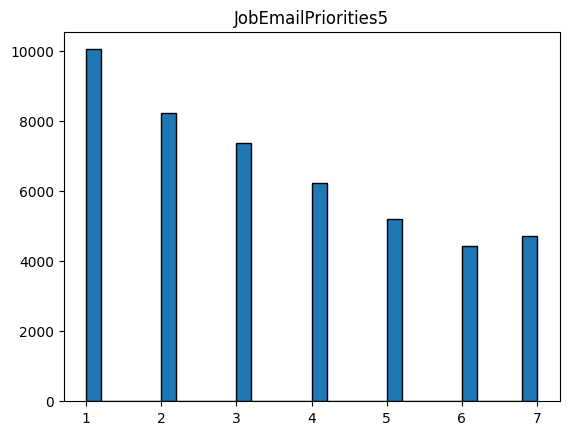

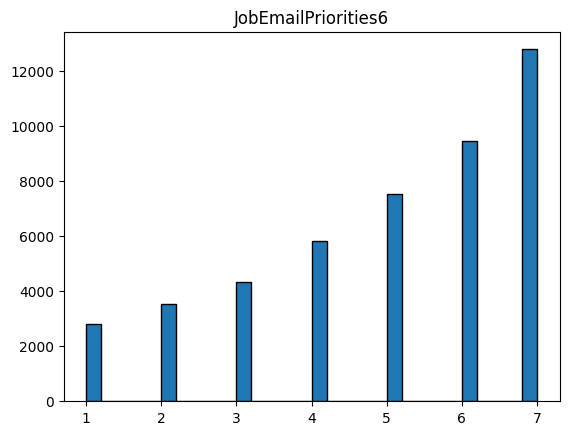

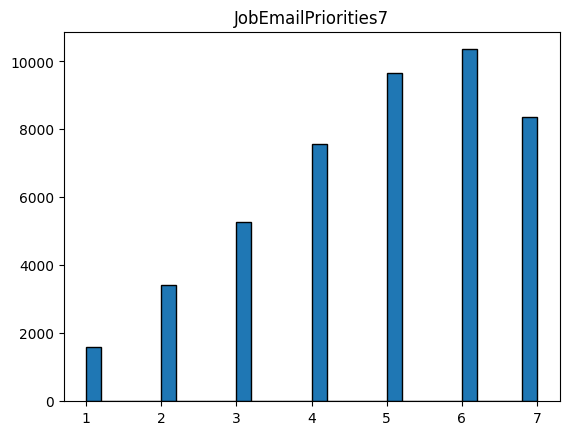

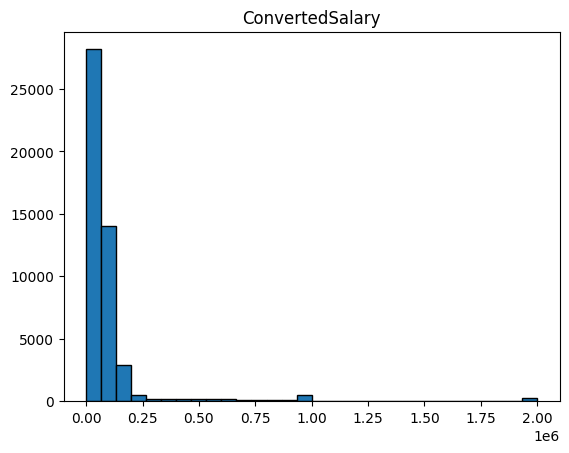

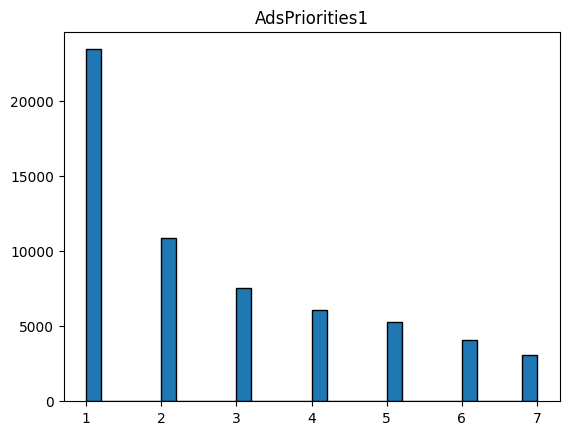

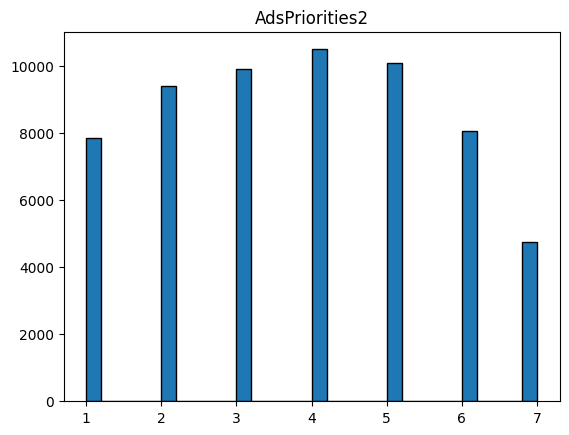

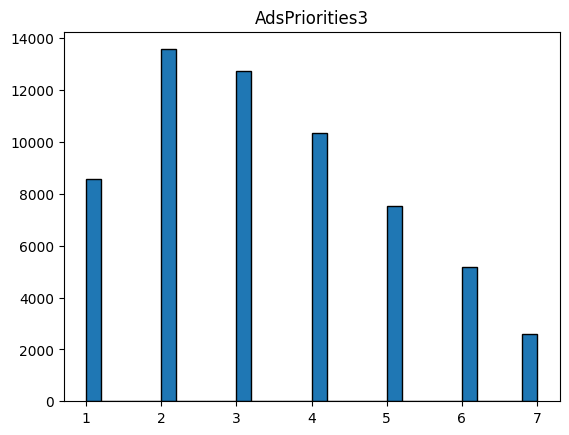

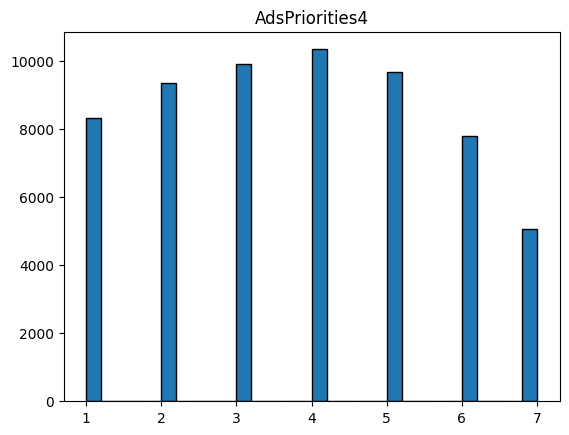

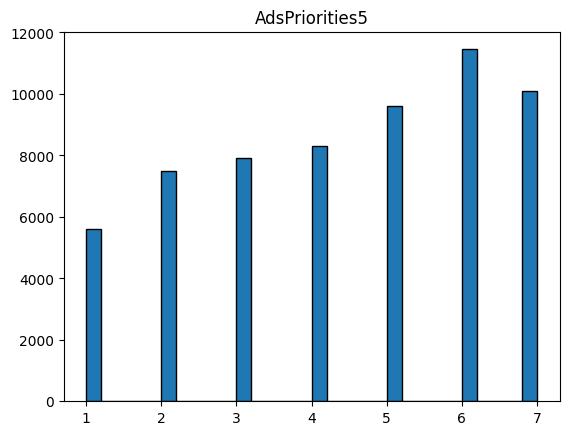

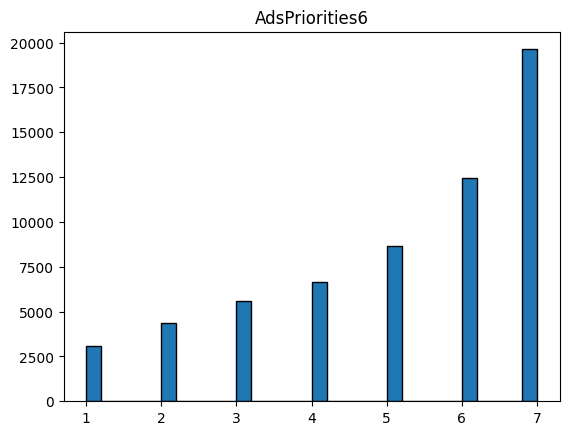

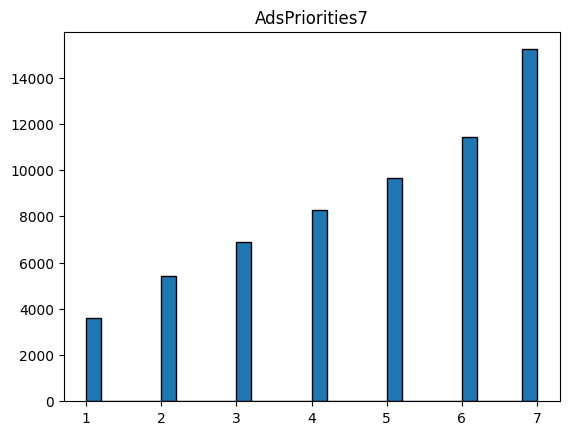

In [8]:
# Univariate Analysis
## For Numerical Columns
print("\nUnivariate Analysis: Numerical Columns")
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_columns:
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f"{col}")
    plt.show()

In [9]:
unique_combinations = df['Employment'].unique()
print(len(unique_combinations))

7


In [10]:
df['RemoteWork'].unique()

KeyError: 'RemoteWork'

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

def process_employment(df):
    # Handle Missing Values
    df['Employment'].fillna('Unknown', inplace=True)

    # Split the Combinations
    df['Employment_split'] = df['Employment'].apply(lambda x: x.split(';'))

    # One-hot Encoding
    mlb = MultiLabelBinarizer()
    one_hot = mlb.fit_transform(df['Employment_split'])
    one_hot_df = pd.DataFrame(one_hot, columns=mlb.classes_)

    # Concatenate
    df = pd.concat([df, one_hot_df], axis=1)

    # Normalization (if needed)
    for column in one_hot_df.columns:
        df[column] = df[column] / df[column].sum()

    return df

In [15]:
process_employment(df)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,"Employed, full-time","Employed, part-time",I prefer not to say,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time",Unknown
0,1,I agree,None of these,18-24 years old,Unknown,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000778
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,0.000016,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,0.000016,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,0.000016,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,0.000016,0.000000,0.000000,0.000071,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,0.000016,0.000000,0.000000,0.000071,0.0,0.0,0.0,0.000000,0.000000,0.000000
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,0.000000,0.000199,0.000000,0.000000,0.0,0.0,0.0,0.000085,0.000000,0.000000
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,0.000000,0.000000,0.001821,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,0.000000,0.000199,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000295,0.000000


In [16]:
def process_employment_for_olap(df):
    # Extract unique employment statuses
    employment_statuses = set()
    for status_list in df['Employment'].str.split(';'):
        if status_list is not np.nan:
            for status in status_list:
                employment_statuses.add(status)

    # Create dimension table
    employment_df = pd.DataFrame(list(employment_statuses), columns=['Employment_Status'])
    employment_df['Employment_Status_ID'] = range(1, len(employment_df) + 1)

    # Create link table
    link_list = []
    for idx, row in df.iterrows():
        if row['Employment'] is not np.nan:
            for status in row['Employment'].split(';'):
                status_id = employment_df.loc[employment_df['Employment_Status'] == status, 'Employment_Status_ID'].iloc[0]
                link_list.append({'Survey_Response_ID': idx, 'Employment_Status_ID': status_id})

    link_df = pd.DataFrame(link_list)

    return employment_df, link_df


In [17]:
employment_dim_df, employment_link_df = process_employment_for_olap(df)


In [19]:
# employment_dim_df
employment_link_df

,Survey_Response_ID,Employment_Status_ID
0,0,4
1,1,6
2,2,6
3,3,6
4,4,6
...,...,...
103199,89180,8
103200,89181,1
103201,89182,8
103202,89182,5


In [21]:
def process_categorical_for_olap(df, col_name):
    # Drop NaNs and get unique categories
    unique_categories = set()
    for item_list in df[col_name].dropna():
        for item in item_list.split(';'):
            unique_categories.add(item.strip())
            
    # Create a DataFrame for the dimension table
    dim_df = pd.DataFrame(list(unique_categories), columns=[col_name])
    dim_df[f"{col_name}_ID"] = range(1, len(dim_df) + 1)
    
    # Create a mapping from category to ID
    category_to_id = dim_df.set_index(col_name).to_dict()[f"{col_name}_ID"]
    
    # Update the main DataFrame to use IDs
    def map_to_id(item_list):
        if pd.isna(item_list):
            return None
        return [category_to_id[item.strip()] for item in item_list.split(';')]

    df[f"{col_name}_ID"] = df[col_name].apply(map_to_id)
    
    return dim_df, df


In [22]:
dim_df, df = process_categorical_for_olap(df, "CodingActivities")


In [12]:
dim_df

NameError: name 'dim_df' is not defined